### Week 2 Homework

For questions 1 and 2: 

Do a regression to estimate the fixed effect of each group. We assume that there is one single linear coefficient for all the data, plus the fixed effect of each group. Use the file homework_2.1.csv.  The variables G1, G2, and G3 are the outcomes and the time is the treatment.

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

In [2]:
# read the homework 2.1 file
df_1 = pd.read_csv(r'C:\Users\JT von Seggern\DS Masters Repos\2025-summer-mod-6\homework_2.1.csv')
df_1 = df_1.drop(columns=['Unnamed: 0'])

In [3]:
df_1

,time,G1,G2,G3
0,0,0.882026,1.441575,0.065409
1,1,0.210079,-0.163880,0.140310
2,2,0.509369,-0.115242,0.819830
3,3,1.150447,1.014698,0.607632
4,4,0.973779,-0.046562,0.610066
...,...,...,...,...
95,95,1.303287,1.364227,1.768446
96,96,0.965250,1.845895,1.258862
97,97,1.862935,1.881752,1.511477
98,98,1.043456,2.561618,1.030275


In [4]:
# create a new dataframe that stacks all the group values into a single column
df_1_2 = pd.DataFrame(columns=['time', 'value', 'group'])
for col in df_1.columns:
    if col.startswith('G'):
        temp_df = df_1[['time', col]].rename(columns={col: 'value'})
        temp_df['group'] = col
        df_1_2 = pd.concat([df_1_2, temp_df], ignore_index=True)

df_1_2

C:\Users\JT von Seggern\AppData\Local\Temp\ipykernel_15896\2842754737.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_1_2 = pd.concat([df_1_2, temp_df], ignore_index=True)


,time,value,group
0,0,0.882026,G1
1,1,0.210079,G1
2,2,0.509369,G1
3,3,1.150447,G1
4,4,0.973779,G1
...,...,...,...
295,95,1.768446,G3
296,96,1.258862,G3
297,97,1.511477,G3
298,98,1.030275,G3


<Axes: xlabel='time', ylabel='value'>

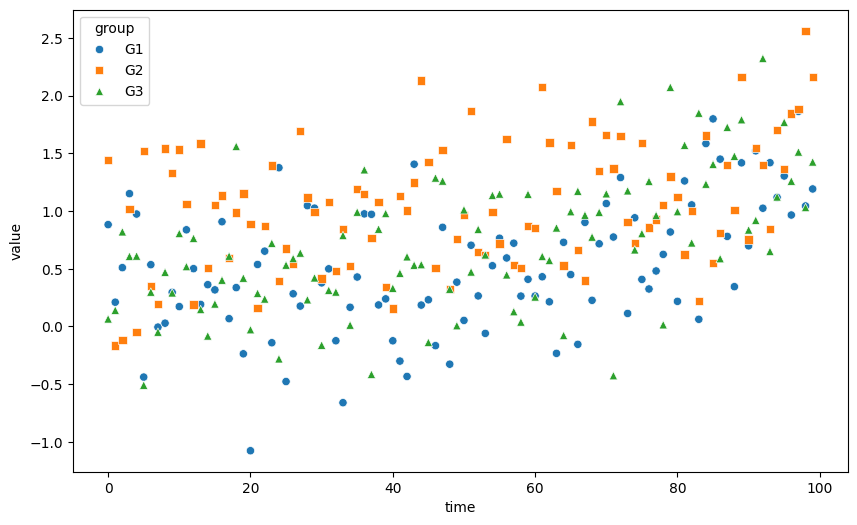

In [5]:
# plot the data
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_1_2, x='time', y='value', hue='group', style='group', markers=['o', 's', '^'])

### Fixed Effects of df_1

In [29]:
from sklearn.linear_model import LinearRegression

In [26]:
for item in df_1_2['group'].unique():
    lm = LinearRegression()
    lm.fit(np.asarray(df_1_2[df_1_2['group'] == item]['time']).reshape(-1,1),
           df_1_2[df_1_2['group'] == item]['value'])
    print(f"Group: {item}, Coefficient: {lm.coef_[0]}, Intercept: {lm.intercept_}")

Group: G1, Coefficient: 0.008498349168608876, Intercept: 0.10423572392110297
Group: G2, Coefficient: 0.007080468022766024, Intercept: 0.6855233182470004
Group: G3, Coefficient: 0.011472822938003087, Intercept: 0.1474791342890157


In [28]:
# Train a linear model on the entire dataset
X = np.asarray(df_1_2['time']).reshape(-1,1)
Y = np.asarray(df_1_2['value'])

lm2 = LinearRegression()
lm2.fit(X,Y)

print(f"Overall Coefficient: {lm2.coef_[0]}, Intercept: {lm2.intercept_}")

Overall Coefficient: 0.009017213376459325, Intercept: 0.3124127254857066


### Boostrap Simulation

In [33]:
df_2 = pd.read_csv(r"C:\Users\JT von Seggern\DS Masters Repos\2025-summer-mod-6\homework_2.2.csv")
df_2 = df_2.drop(columns=['Unnamed: 0'])
df_2.head()

,X,Y,Z
0,0,1.182435,-0.725820
1,0,2.714474,0.563476
2,0,0.077612,-0.435632
3,0,-0.154449,-0.104553
4,0,22.298992,-2.321273


<Axes: xlabel='Z', ylabel='Y'>

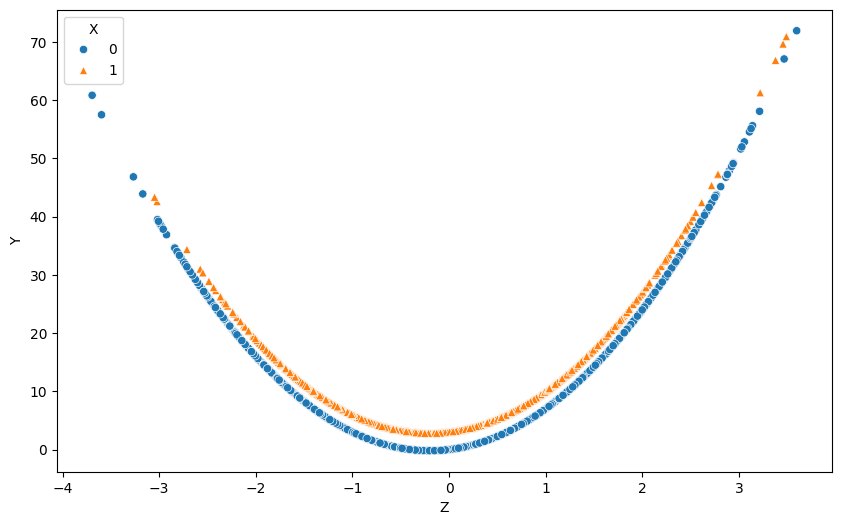

In [36]:
# Plot the data
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_2, x='Z', y='Y', hue='X', style='X', markers=['o', '^'])

In [40]:
# find the mean for each unique value of X
df_2['diff'] = df_2['Y'] - df_2['Z']
mean_0 = df_2[df_2['X'] == 0]['diff'].mean()
mean_1 = df_2[df_2['X'] == 1]['diff'].mean()
means = mean_1 - mean_0
means

np.float64(2.8727011728382346)

In [ ]:

data = df_2[['X', 'Y', 'Z']]

for val in data['X'].unique():

    # 2. Define bootstrap parameters
    n_bootstraps = 10_000
    boot_means = np.empty(n_bootstraps)

    # 3. Perform the bootstrap: resample with replacement and compute the mean
    for i in range(n_bootstraps):
        sample = np.random.choice(data, size=data.shape[0], replace=True)
        boot_means[i] = sample.mean()

    
